In [1]:
import pandas as pd
from scutquant import scutquant, alpha, executor

In [2]:
# 读取数据并初步加工

df = pd.read_feather('D:/Desktop/q3/q3data.ftr')
df = df.set_index(['time', 'code']).sort_index()
df = df[~df.index.duplicated()]  # 由于数据集的问题，部分索引会重复
df = scutquant.clean(df)

df['ret'] = df['lastPrice'].groupby(['code']).apply(lambda x: scutquant.price2ret(x, -1, -21))
df.dropna(axis=0, inplace=True)

In [3]:
# 生成因子

factor_config = {
    'data': df,
    'label': 'ret',
    'price': 'lastPrice',
    'last_close': 'lastClose',
    'volume': 'volume',
    'amount': 'amount',
    'high': 'high',
    'low': 'low',
    'groupby': 'code',
    'shift': 21
}
X = alpha.make_factors(factor_config, windows=[5, 10, 20])
data_preprocess = pd.concat([X, df['ret']], axis=1)
data_preprocess = data_preprocess[~data_preprocess.index.duplicated()]  # 不知为何又出现了重复索引

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 254511 entries, (Timestamp('2022-10-10 09:30:00'), '000049.SZ') to (Timestamp('2022-10-31 14:56:00'), '601318.SH')
Data columns (total 55 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ma5     254411 non-null  float64
 1   std5    254411 non-null  float64
 2   max5    254411 non-null  float64
 3   min5    254411 non-null  float64
 4   beta5   254427 non-null  float64
 5   roc5    254427 non-null  float64
 6   ma10    254391 non-null  float64
 7   std10   254391 non-null  float64
 8   max10   254391 non-null  float64
 9   min10   254391 non-null  float64
 10  beta10  254427 non-null  float64
 11  roc10   254427 non-null  float64
 12  ma20    254351 non-null  float64
 13  std20   254351 non-null  float64
 14  max20   254351 non-null  float64
 15  min20   254351 non-null  float64
 16  beta20  254427 non-null  float64
 17  roc20   254427 non-null  float64
 18  MA5     254495 non-null  float64
 19 

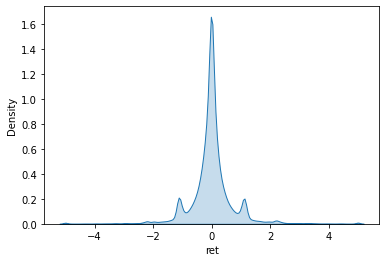

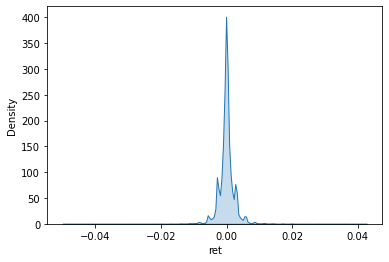

norm data done 

MA5       3.922730
STD5      3.920095
MIN5      3.905767
MAX5      3.905627
MA10      3.801721
STD10     3.800683
MIN10     3.797294
MAX10     3.795792
MIN20     3.667937
MAX20     3.659076
MA20      3.645135
STD20     3.643093
rsv20     3.294200
rsv10     3.292853
rsv5      3.290986
min20     3.049437
max20     2.983399
min10     2.836460
max10     2.780680
min5      2.655128
max5      2.617451
ROC20     2.535738
ROC10     2.524792
ROC5      2.411362
beta20    2.005186
beta10    1.959382
beta5     1.899617
hml5      1.817581
hml10     1.805215
hml20     1.789142
ma5       1.740444
std5      1.740216
vwap20    1.468363
vwap10    1.414035
vwap5     1.385110
ma10      1.290136
std10     1.290122
std20     0.892065
ma20      0.892020
risk5     0.520549
roc20     0.489407
risk10    0.430323
roc10     0.422199
roc5      0.402503
risk20    0.394725
BETA20    0.283762
BETA10    0.218776
vstd20    0.193168
vma20     0.192329
BETA5     0.149295
vstd10    0.144954
vma10     0.14

In [4]:
# 数据重采样、标准化、因子正交化、特征选择、数据清洗等

x_train, x_test, y_train, y_test, ymean, ystd = scutquant.auto_process(data_preprocess, 'ret')

E:\Anaconda3.5\lib\site-packages\xgboost\sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,


[0]	validation_0-rmse:1.06799
[1]	validation_0-rmse:1.05798
[2]	validation_0-rmse:1.04897
[3]	validation_0-rmse:1.04075
[4]	validation_0-rmse:1.03280
[5]	validation_0-rmse:1.02548
[6]	validation_0-rmse:1.01885
[7]	validation_0-rmse:1.01253
[8]	validation_0-rmse:1.00664
[9]	validation_0-rmse:1.00171
[10]	validation_0-rmse:0.99684
[11]	validation_0-rmse:0.99228
[12]	validation_0-rmse:0.98821
[13]	validation_0-rmse:0.98432
[14]	validation_0-rmse:0.98092
[15]	validation_0-rmse:0.97750
[16]	validation_0-rmse:0.97465
[17]	validation_0-rmse:0.97193
[18]	validation_0-rmse:0.96943
[19]	validation_0-rmse:0.96689
[20]	validation_0-rmse:0.96494
[21]	validation_0-rmse:0.96292
[22]	validation_0-rmse:0.96098
[23]	validation_0-rmse:0.95949
[24]	validation_0-rmse:0.95764
[25]	validation_0-rmse:0.95625
[26]	validation_0-rmse:0.95475
[27]	validation_0-rmse:0.95361
[28]	validation_0-rmse:0.95260
[29]	validation_0-rmse:0.95171
[30]	validation_0-rmse:0.95063
[31]	validation_0-rmse:0.95008
[32]	validation_0-

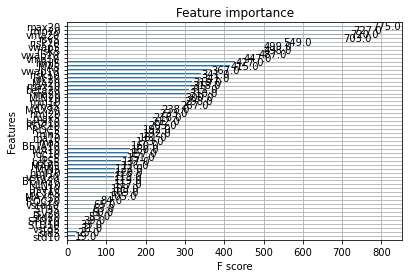

BETA5     0.061622
rsv20     0.033163
MAX20     0.029983
MIN10     0.028437
max20     0.028077
MIN20     0.026118
MAX10     0.025321
hml20     0.024184
MIN5      0.023207
vwap5     0.022972
rsv5      0.022786
rsv10     0.022705
min20     0.022375
min10     0.022280
BETA20    0.022016
ma20      0.021756
vma10     0.020860
vwap10    0.020669
max5      0.020127
risk20    0.019897
beta20    0.019559
std20     0.019143
MA20      0.018823
MAX5      0.018649
max10     0.018356
STD10     0.018260
vwap20    0.018254
risk10    0.018006
BETA10    0.017662
vma20     0.017589
vstd10    0.017374
MA10      0.016872
vstd20    0.016854
ROC5      0.015753
hml10     0.015608
ROC20     0.015553
hml5      0.015410
risk5     0.014919
STD20     0.013739
ma10      0.013688
min5      0.013663
MA5       0.013496
STD5      0.012131
ROC10     0.011727
beta10    0.010923
std5      0.010788
roc20     0.010756
vstd5     0.010625
vma5      0.010188
std10     0.010057
beta5     0.008193
ma5       0.006930
roc10     0.

In [5]:
# 训练模型，包括配置参数、训练和解释模型

xgb_params = {
    'est': 800,
    'eta': 0.0421,
    'colsamp': 0.8875,
    'subsamp': 0.8725,
    'max_depth': 10,
    'l1': 45,
    'l2': 50,
    'early_stopping_rounds': 20
}
model = scutquant.hybrid(lrg_method='ridge', xgb_params=xgb_params, weight=[0.1, 0.9])
model.fit(x_train, y_train, x_test, (y_test-ymean)/ystd)
model.explain_model(index=x_test.columns)

In [6]:
# 得到预测值

pred_train = model.predict(x_train)
pred_train = pd.DataFrame({'predict': pred_train}, index=x_train.index)
pred_train += ymean
pred_train *= ystd

pred_test = model.predict(x_test)
pred_test = pd.DataFrame({'predict': pred_test}, index=x_test.index)
pred_test += ymean
pred_test *= ystd

pred = pd.concat([pred_train, pred_test], axis=0)

In [7]:
# 此处仅使用测试集数据进行IC分析

ic, icir, rank_ic, rank_icir = scutquant.ic_ana(pred_test, y_test, groupby='time', plot=False)
print('ic=', ic, 'icir=', icir, 'rank_ic=', rank_ic, 'rank_icir=', rank_icir)

ic= 0.04319978432930864 icir= 0.06075385968073295 rank_ic= 0.037022183632665566 rank_icir= 0.05509833126807084


In [8]:
# 将数据整理成executor要求的样子（索引为多重索引[('time', 'code')], 数据的列名包括 'predict'、'time' 和 'price'）

df1 = df[df.index.isin(pred.index)]
df1.reset_index(inplace=True)
df1['t'] = df1['time']
df1 = df1.set_index(['time', 'code']).sort_index()

pred['time'] = df1['t']
pred['price'] = df1['lastPrice']

E:\Anaconda3.5\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [9]:
#  todo: 自动生成price，在给定总资金量时自动生成position

acc = {
    'cash': 4000000,
    'position': {'601318.SH': 36100, '002303.SZ': 470200, '000049.SZ': 36100, '000333.SZ': 30400},
    'available': {'601318.SH': 36100, '002303.SZ': 470200, '000049.SZ': 36100, '000333.SZ': 30400},
    'price': {'601318.SH': 41.58, '002303.SZ': 3.19, '000049.SZ': 41.59, '000333.SZ': 49.31}
}

In [10]:
# 执行回测，输入参数分别为信号生成模式(generate/generate_series/simulate)，后两种目前还没实现；账户信息；买入和卖出费率；
# 最低交易费用和风险度

exe = executor.Executor(generator={'mode': 'generate'}, acc=acc, cost_buy=0.00015, cost_sell=0.00005, min_cost=5, risk_degree=0.95)
exe.execute(data=pred)

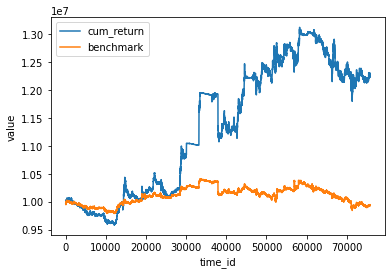

In [11]:
# 绘制资金曲线（目前可获取的数据有资金曲线、交易记录、风险度曲线、交易费用、持仓量和可用持仓量，这里只展示资金曲线和风险度曲线）

import matplotlib.pyplot as plt

user_account, benchmark = exe.user_account.val_hist, exe.benchmark.val_hist
acc_hist, ben_hist = pd.DataFrame({'value': user_account}), pd.DataFrame({'value': benchmark})

plt.plot(acc_hist, label='cum_return')
plt.plot(ben_hist, label='benchmark')
plt.xlabel('time_id')
plt.ylabel('value')
plt.legend()
plt.show()

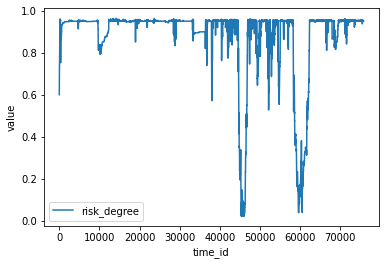

In [12]:
risk = pd.DataFrame({'risk': exe.user_account.risk_curve})

plt.plot(risk, label='risk_degree')
plt.xlabel('time_id')
plt.ylabel('value')
plt.legend()
plt.show()